<a href="https://colab.research.google.com/github/Shadoww002/PyTorch-Learning/blob/main/Chapter%201%20%E2%80%93%20PyTorch%20Workflow/Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn


In [41]:
## create known parameters
weight = 0.6
bias = 0.4

In [42]:
## create known data
start = 0
end = 1
step = 0.01

X = torch.arange(start ,end, step).unsqueeze(dim=1)
y = X * weight + bias

X[:6] ,y[:6]


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500]]),
 tensor([[0.4000],
         [0.4060],
         [0.4120],
         [0.4180],
         [0.4240],
         [0.4300]]))

In [43]:
len(X) , len(y)

(100, 100)

In [44]:
## Training and Testing split of data
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

len(X_train),len(X_test) , len(y_train) , len(y_test)

(80, 20, 80, 20)

In [45]:
## building a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels, c="b" , s=5 ,label="Training data")

  plt.scatter(test_data ,test_labels , c="g" , s=5 , label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data , predictions, c="r" , s=5 , label ="Predictions")

  plt.legend()

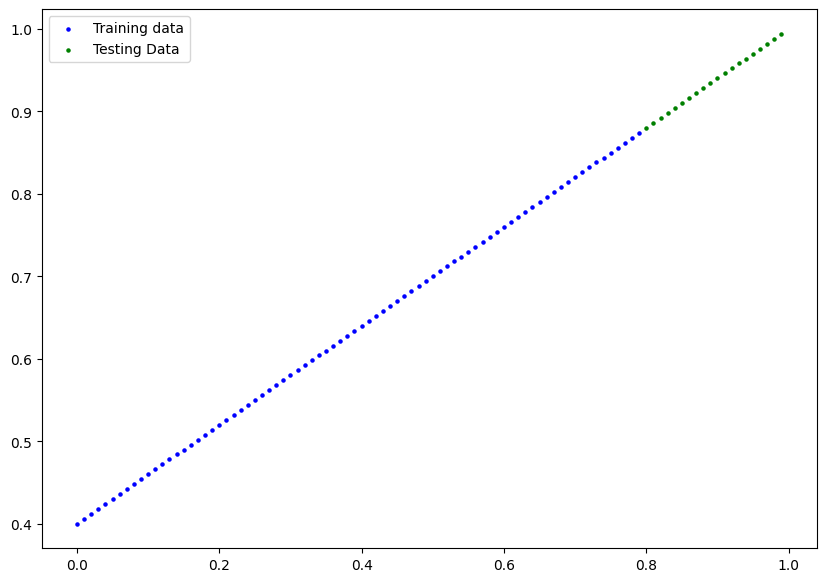

In [46]:
plot_predictions()

In [47]:
## Building First Model using PyTorch i.e Linear Regression

from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad =True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))

  def forward(self , x:torch.tensor)-> torch.Tensor :
      return self.weight * x + self.bias

In [48]:
## PyTorch Model Building Essentials

# torch.nn -> contains all of the building for computational graphs(a neural network can be considered a computational graph)
# torch.nn.parameter -> what parameter should our model try and learn ,often pytorch layer from torch.nn will set these of us
# torch.nn.Module -> The Base class for all neural network moduls
# torch.optim -> this is where optimisers in pytorch live
# def forward() -> all nn.Module subclass requires ypu to overwrite forward() , this method defines what happens in the forward computation

In [49]:
torch.manual_seed(33)

# creating an instance of the model
model_0 = LinearRegressionModel()

#checking parameters
list(model_0.parameters())

[Parameter containing:
 tensor([1.1982], requires_grad=True),
 Parameter containing:
 tensor([-0.3998], requires_grad=True)]

In [50]:
model_0.state_dict()


OrderedDict([('weight', tensor([1.1982])), ('bias', tensor([-0.3998]))])